# Zero-crossing rate

By looking at different speech and audio waveforms, we can see that
depending on the content, they vary a lot in their smoothness. For
example, voiced speech sounds are more smooth than unvoiced ones.
Smoothness is thus a informative characteristic of the signal.

A very simple way for measuring smoothness of a signal is to calculate
the number of zero-crossing within a segment of that signal. A voice
signal oscillates slowly - for example, a 100 Hz signal will cross zero
100 per second - whereas an unvoiced fricative can have 3000 zero
crossing per second. An implementation of the zero-crossing for a signal $x_h$ at window $k$ is
$$
ZCR_k = \sum_{h=kM}^{kM+N} \left|{\mathrm{sign}}(x_h)-{\mathrm{sign}}(x_{h-1})\right|,
$$
where $M$ is the step between analysis windows and $N$ the analysis window length.

To calculate of the zero-crossing rate of a signal you need to compare
the sign of each pair of consecutive samples. In other words, for a
length $N$ signal you need $O(N)$ operations. Such calculations are also
extremely simple to implement, which makes the zero-crossing rate an
attractive measure for low-complexity applications. However, there are
also many drawbacks with the zero-crossing rate:

-   The number of zero-crossings in a segment is an integer number. A
    continuous-valued measure would allow more detailed analysis.
-   Measure is applicable only on longer segments of the signal, since
    short segments might not have any or just a few zero crossings.
-   To make the measure consistent, we must assume that the signal is
    zero-mean. You should therefore subtract the mean of each segment
    before calculating the zero-crossings rate.

An alternative to the zero-crossing rate is to calculate the
[autocorrelation](Autocorrelation_and_autocovariance) at lag-1. It can
be estimated also from short segments, it is continuous-valued and
arithmetic complexity is also $O(N)$.

  


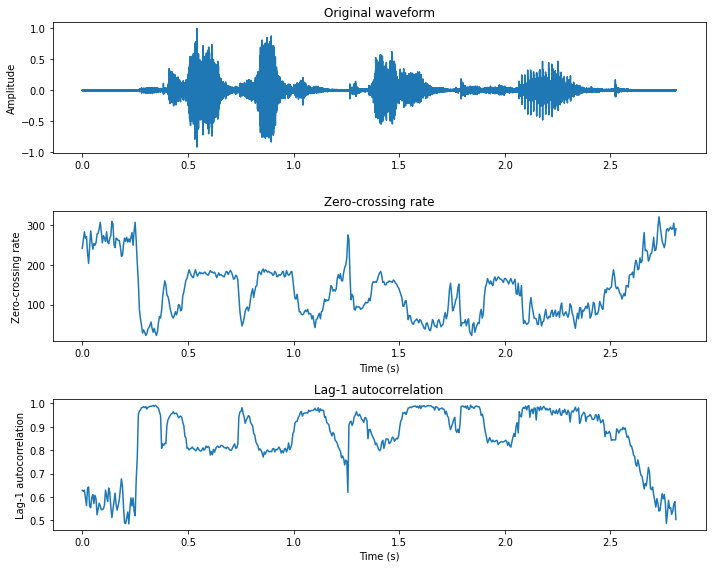

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile


# read from storage
filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)
data = np.float64(data)

# window parameters in milliseconds
window_length_ms = 30
window_step_ms = 5

window_step = int(np.round(fs*window_step_ms/1000))
window_length = window_step*2
window_count = int(np.floor((data.shape[0]-window_length)/window_step)+1)


# Extract windows
window_matrix = np.zeros([window_length,window_count],dtype=np.float64)
for window_ix in range(window_count):    
    window_matrix[:,window_ix] = data[window_ix*window_step+np.arange(window_length)]
    

# Count zero crossings in each window
zcr = np.sum(np.abs(np.diff(np.sign(window_matrix),axis=0)),axis=0)

# Correlation lag-1
xcorr1 = np.mean(window_matrix[0:-2,:]*window_matrix[1:-1,:],axis=0)/np.mean(window_matrix**2,axis=0)

plt.figure(figsize=[10,8])

t = np.linspace(0,len(data)/fs,len(data))
plt.subplot(311)
plt.plot(t,data/np.max(np.abs(data)))
plt.ylabel('Amplitude')
plt.title('Original waveform')

t = np.linspace(0,len(data)/fs,window_count)
plt.subplot(312)
plt.plot(t,zcr)
plt.xlabel('Time (s)')
plt.ylabel('Zero-crossing rate')
plt.title('Zero-crossing rate')

plt.subplot(313)
plt.plot(t,xcorr1)
plt.xlabel('Time (s)')
plt.ylabel('Lag-1 autocorrelation')
plt.title('Lag-1 autocorrelation')

plt.tight_layout()
plt.show()